## generate random planes with noisy points

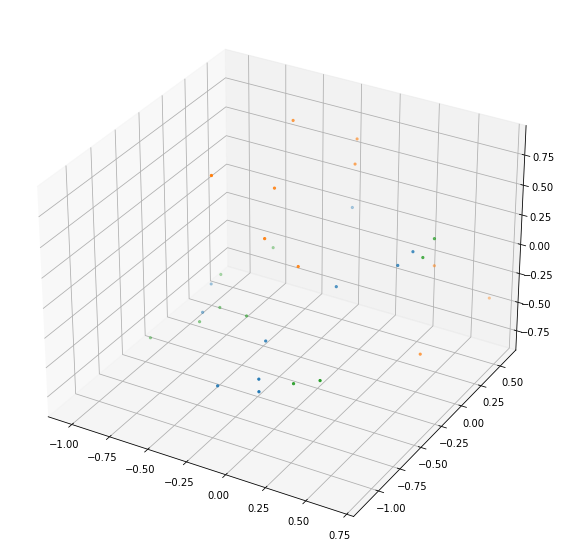

In [1]:
import matplotlib.pyplot as plt
from mlcv import generate_points

df = generate_points([0.001,0.001,0.001],[10,10,10])

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
for part_idx in range(max(df["partition"])+1):
    samples = df[df["partition"] == part_idx]
    samples = samples[["x","y","z"]].to_numpy()
    ax.scatter(samples[:,0], samples[:,1], samples[:,2], marker=".")
plt.show()

## compute costs for this particular (correct) assignment
* distribution of sampled cost approaches a normal distribution with increasing sample size (central limit theorem)

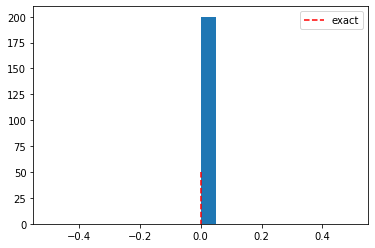

In [2]:
from mlcv import cf, cf_prime, cost, sample_cost

# compute exact cost
cexact = cost(df, "partition", cf, cf_prime)
csampled = []
for i in range(200):
    csampled.append( sample_cost(df, "partition", cf, cf_prime, uvw_sample_count=200) )

fig, ax = plt.subplots(1)
ax.hist(csampled, bins=20)
ax.plot([cexact,cexact], [50,0],"r--",label="exact")
ax.legend()

## for testing purposes: compute cost of random partition
* the resulting cost should be higher

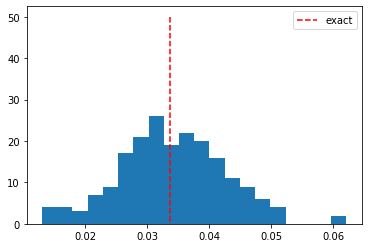

In [3]:
import numpy as np

df["random"] = np.random.choice(max(df["partition"]), df.shape[0])

# compute exact cost
cexact = cost(df, "random", cf, cf_prime)
csampled = []
for i in range(200):
    csampled.append( sample_cost(df, "random", cf, cf_prime, uvw_sample_count=200) )

fig, ax = plt.subplots(1)
ax.hist(csampled, bins=20)
ax.plot([cexact,cexact], [50,0],"r--",label="exact")
ax.legend()

[17 29 19 17 14  0  2  3 16 13 19 11  1 23 26 13 26  2 13  3 17 26 20  7
 24  2  1 25  2 17]
--------------------
449
